### 3 Observations ###

(1) Capomulin shows promise as a drug used to treat cancer with tumor volume decreasing over time, less metastic spread than other drugs or the placebo, and survival percentage. Thus, it may be time to consider human drug trials.

(2) Ketapril may not be viable treatment regimen for cancer with the general population because it show an increase in tumor volume over time and the most metastic spread (even more so than the placebo). Thus, it may be time to discontinue trials on rats for treatment of cancer.

(3) Infubinol shows some short-term promise in treating cancer being better than the placebo with less tumor volume and metastic spread. However, with the ultimate indicator of survival rate, over time, infubinol is performs worse than the placebo. Thus, it may be beneficial to conduct more tests to see why infubinol had some short-term success. Infubinol also shows that tumor volume and metastatic spread may not be perfectly correlated to survival rates.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
drug_trial_df = pd.merge(clinical_df, mouse_df, on="Mouse ID")

# Display the data table for preview
drug_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# store the mean tumor volume data grouped by drug and timepoint with format
tumor_mean = drug_trial_df.groupby(["Drug", "Timepoint"]).mean()['Tumor Volume (mm3)'].unstack(level=0)

# store the standard error tumor volume data grouped by drug and timepoint with format
tumor_sterr = drug_trial_df.groupby(["Drug", "Timepoint"]).sem()['Tumor Volume (mm3)'].unstack(level=0)

# Preview that formatting worked
tumor_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


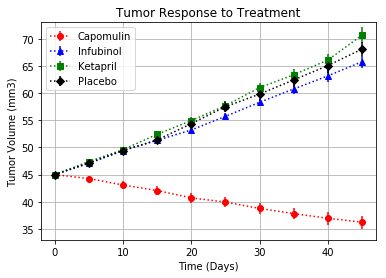

In [3]:
# creating lists for the drugs, color, and tick shape
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
color = ["red", "blue", "green", "black"]
ticks = ["o", "^", "s", "D"]

# generating the plot with error bars
fig, ax = plt.subplots()

# create a for loop to set-up the x-axis, y-axis, and standard error for the errorbar plot
for item in drugs: 
    x_axis = tumor_mean.index.values
    y_axis = tumor_mean[item] 
    err = tumor_sterr[item]
    
    # getting the index for the colors and tick points otherwise everything is black
    index = drugs.index(item)
    # generating the errorbar
    ax.errorbar(x_axis, y_axis, err, linestyle = ":", color = color[index], marker = ticks[index])

# add the grid   
plt.grid(True)

# Setting the x_axis and y_axis limits
ax.set_xlim(-2, 47)
ax.set_ylim(33, 73)

# adding legend
ax.legend(loc = "best")

# naming the title, x_axis, and y_axis labels
ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")

# save the figure
plt.savefig('TumorResponse.png')

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [4]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint with formatting
metastatic_mean_df = drug_trial_df.groupby(["Drug", "Timepoint"]).mean()['Metastatic Sites'].unstack(level=0)

# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint with formatting
metastatic_sterr_df = drug_trial_df.groupby(["Drug", "Timepoint"]).sem()['Metastatic Sites'].unstack(level=0)

# Preview that formatting worked
metastatic_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


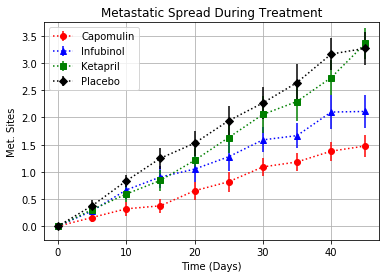

In [5]:
# creating lists for the drugs, color, and tick shape
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
color = ["red", "blue", "green", "black"]
ticks = ["o", "^", "s", "D"]

# generating the plot with error bars
fig, ax = plt.subplots()

# create a for loop to set-up the x-axis, y-axis, and standard error for the errorbar plot
for item in drugs: 
    x_axis = metastatic_mean_df.index.values
    y_axis = metastatic_mean_df[item] 
    err = metastatic_sterr_df[item]
    
    # getting the index for the colors and tick points otherwise everything is black
    index = drugs.index(item)
    # generating the plot
    ax.errorbar(x_axis, y_axis, err, linestyle = ":", color = color[index], marker = ticks[index])

# adding Grid
plt.grid(True)

# Setting the x_axis and y_axis limits
ax.set_xlim(-2, 47)
ax.set_ylim(-.25, 3.75)

# adding legend
ax.legend(loc = "best")

# naming the title, x_axis, and y_axis labels
ax.set_title("Metastatic Spread During Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Met. Sites")

# save the figure
plt.savefig('MetastaticSpread.png')

# Show the Figure
plt.show()

## Survival Rates

In [6]:
# Store the Count of Mice Grouped by Drug and Timepoint with format
mouse_count_df = drug_trial_df.groupby(["Drug", "Timepoint"]).count()['Metastatic Sites'].unstack(level=0)

# Preview the Data Frame
mouse_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


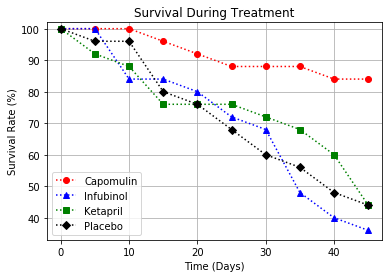

In [7]:
# creating lists for the drugs, color, and tick shape
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
color = ["red", "blue", "green", "black"]
ticks = ["o", "^", "s", "D"]

# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots()

# create a for loop to set-up the x-axis, y-axis
for item in drugs: 
    x_axis = mouse_count_df.index.values
    
    # to determine percentage take the item in drugs and divide by the starting mouse count (could also just divide by 25)
    y_axis = (mouse_count_df[item] / mouse_count_df[item][0]) * 100
    
    # getting the index for the colors and tick points otherwise everything is black
    index = drugs.index(item)
    
    # generating the plot
    ax.plot(x_axis, y_axis, linestyle = ":", color = color[index], marker = ticks[index])
      

# add the grid   
plt.grid(True)

# Setting the x_axis and y_axis limits
ax.set_xlim(-2, 47)
ax.set_ylim(33, 102)

# adding legend
ax.legend(loc = "best") 

# naming the title, x_axis, and y_axis labels
ax.set_title("Survival During Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")

# save the figure
plt.savefig('SurvivalRate.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [8]:
# Calculate the percent changes for each drug
tumor_percent = drug_trial_df.groupby(["Drug", "Timepoint"]).mean()['Tumor Volume (mm3)'].unstack(level=0)

tumor_percent = (((tumor_percent.iloc[-1] - tumor_percent.iloc[0]) / tumor_percent.iloc[0]) * 100)

# Display the data to confirm
tumor_percent

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

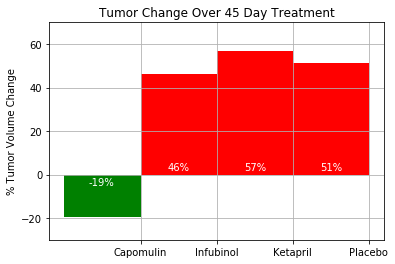

In [13]:
# set up y value as percent change for only desired drugs
tumor_percent = tumor_percent[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

# set x value as the index to percent change
x_axis = tumor_percent.index

# create variable based on a list comprehension for colors of the bar
colors = ['red' if y >=0 else 'green' for y in tumor_percent]

# plot that bar
plt.bar(x_axis, tumor_percent, width=-1, color=colors, align="edge")

# add grid
plt.grid(True)

# add title and y label
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

#loops through tumor change data and places the value in the correct position based on + or - values
count = 0 - .35

for t in tumor_percent:
    if t < 0:
        y_coor = -5
    else:
        y_coor = 2
    plt.text(count, y_coor, str(round(t)) + '%', ha = 'right', color = 'white')
    count += 1

# set y-ticks
plt.yticks(np.arange(-20, 80, 20))

# set y limit
plt.ylim(-30, 70)
    
# Save the Figure
plt.savefig('TumorChangePercentage.png')

# Show the Figure
plt.show()